# <bold> Classification using Logistic Regression<bold>


###  <br> Agenda : <br>
*  Introduction to logistic regression
*  Data importing
*  Data cleaning 
*  EDA (Exploratory data analysis) 
*  Feature selection 
*  Creating regression model 
*  Model evaluation
*  BONUS hyperparameter tunning using GridSearch with cross validation
*  Tools and libraries

<br><br>

       

### <br>What is logistic regression ? <br><br>

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. <br><br><br>

What are the types of logistic regression
*  <b>Binary</b> (eg. Tumor Malignant or Benign)
*  <b>Multi-linear functions failsClass</b> (eg. Cats, dogs or Sheep's)<br><br>

Logistic regression transforms its output using the logistic sigmoid function to return a probability value.<br> <br>

#### What is the Sigmoid Function?<br>
In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1.<br> 
In machine learning, we use sigmoid to map predictions to probabilities.<br><br>
<img src="https://miro.medium.com/max/1056/1*OUOB_YF41M-O4GgZH_F2rw.png" alt="Sigmoid Function" height="442" width="442"><br><br>

In this example of Clevlaned hospital heart attack predictions I'm trying to predict whether or not person will have heart attack based on data(cholesterol, age, sex, chest pain etc.)<br>
So this is classification 'problem' and I will use <b>logistic regression</b> to solve this task.<br>
Also I will show how to customize model for this particular bussiness scenario (improving model by reducing error)

## <br> Let's start with our task<br>
###  <br>Clevlaned hospital heart attack predictions <br>


#### <br> 1.  Data importing <br>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv(r"D:\ClevlendHeartAttackPredict.csv")

In [4]:
#print first 5 rows of data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [5]:
# information about index, columns(number of columns, number of non null values and types)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      294 non-null object
chol          294 non-null object
fbs           294 non-null object
restecg       294 non-null object
thalach       294 non-null object
exang         294 non-null object
oldpeak       294 non-null float64
slope         294 non-null object
ca            294 non-null object
thal          294 non-null object
num           294 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.2+ KB


In [6]:
# describe data columns
data.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [7]:
# print column names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [8]:
# rename column 'num       ' to 'num'
data.rename(columns={'num       ':'num'},inplace=True)

#### <br> 2. Data cleaning <br>

In [9]:
# print sum of null values in every column
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
# Look like there is no null values but with data.head() I saw data with values '?'
# I will replace '?' values with NaN

data.replace('?',np.NaN,inplace=True)

In [11]:
# Now there are null values and it's important to remove/replace them(or replace NaN's)
# If I remove NaN's from data it is possible to lose some valuable informations 
# so best idea is to replace that NaN's with values

data.isna().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

In [12]:
# 'chol' column

# In 'chol' column values are numeric but they are stored as string(object type)

data.chol.value_counts(dropna=False)

NaN    23
230     5
246     5
275     5
211     4
196     4
215     4
260     4
216     4
238     4
237     4
224     4
263     4
248     3
225     3
288     3
195     3
182     3
198     3
207     3
308     3
160     3
291     3
201     3
222     3
184     3
193     3
268     3
213     3
223     3
       ..
242     1
204     1
117     1
173     1
240     1
175     1
228     1
205     1
340     1
287     1
466     1
331     1
358     1
226     1
167     1
161     1
271     1
85      1
328     1
518     1
129     1
221     1
282     1
274     1
355     1
603     1
318     1
307     1
100     1
172     1
Name: chol, Length: 154, dtype: int64

In [13]:
# Convert values to numeric in column 'chol' and set errors to 'coerce'
data.chol=pd.to_numeric(data.chol,errors='coerce')

In [14]:
# Interpolate linearly NaN values

data.chol.interpolate(how='linear',inplace=True)

In [15]:
# Convert values to int since they are float type

data.chol=data.chol.astype(int)

In [16]:
# 'trestbps' column
# In 'trestbps' column values are numeric but they are stored as string(object type)

data.trestbps.value_counts(dropna=False)

120    65
130    54
140    50
150    23
110    21
160    20
125     8
100     6
180     6
135     5
145     5
170     5
112     3
122     2
118     2
115     2
124     2
98      1
108     1
155     1
128     1
113     1
136     1
190     1
106     1
132     1
200     1
92      1
105     1
142     1
138     1
NaN     1
Name: trestbps, dtype: int64

In [17]:
# convert column to numeric type
# iterpolate data 
# convert to int

data.trestbps=pd.to_numeric(data.trestbps,errors='coerce')
data.trestbps.interpolate(how='linear',inplace=True)
data.trestbps=data.trestbps.astype(int)

In [18]:
# 'fbs' column
# In 'chfbsol' column values are numeric but they are stored as string(object type)

data.fbs.value_counts(dropna=False)

0      266
1       20
NaN      8
Name: fbs, dtype: int64

In [19]:
# convert column to numeric type
# iterpolate data 
# convert to int

data.fbs=pd.to_numeric(data.fbs,errors='coerce')
data.fbs.interpolate(how='linear',inplace=True)
data.fbs=data.fbs.astype(int)

In [20]:
# 'restecg' column
# In 'restecg' column values are numeric but they are stored as string(object type)

data.restecg.value_counts(dropna=False)

0      235
1       52
2        6
NaN      1
Name: restecg, dtype: int64

In [21]:
# convert column to numeric type
# iterpolate data 
# convert to int

data.restecg=pd.to_numeric(data.restecg,errors='coerce')
data.restecg.interpolate(how='linear',inplace=True)
data.restecg=data.trestbps.astype(int)

In [22]:
# 'thalach' column
# In 'thalach' column values are numeric but they are stored as string(object type)

data.thalach.value_counts(dropna=False)

150    29
140    21
130    17
170    14
160    13
120    11
110     9
142     8
125     8
135     7
155     7
100     7
175     6
115     6
138     6
180     6
145     6
118     5
122     5
124     4
116     4
137     4
134     4
165     4
98      4
112     3
92      3
168     3
144     3
132     3
       ..
146     2
126     2
94      2
154     2
119     1
103     1
178     1
105     1
188     1
190     1
121     1
106     1
90      1
156     1
166     1
102     1
153     1
167     1
129     1
87      1
91      1
176     1
82      1
108     1
139     1
127     1
162     1
143     1
114     1
NaN     1
Name: thalach, Length: 72, dtype: int64

In [23]:
# convert column to numeric type
# iterpolate data 
# convert to int

data.thalach=pd.to_numeric(data.thalach,errors='coerce')
data.thalach.interpolate(how='linear',inplace=True)
data.thalach=data.thalach.astype(int)

In [24]:
# 'exang' column
# In 'exang' column values are numeric but they are stored as string(object type)

data.exang.value_counts(dropna=False)

0      204
1       89
NaN      1
Name: exang, dtype: int64

In [25]:
# convert column to numeric type
# iterpolate data 
# convert to int

data.exang=pd.to_numeric(data.exang,errors='coerce')
data.exang.interpolate(how='linear',inplace=True)
data.exang=data.exang.astype(int)

In [26]:
# 'slope' column
# In 'slope' column values are numeric but they are stored as string(object type)

data.slope.value_counts(dropna=False)

NaN    190
2       91
1       12
3        1
Name: slope, dtype: int64

In [27]:
# convert column to numeric type
# iterpolate data 
# convert to int

data.slope=pd.to_numeric(data.slope,errors='coerce')
data.slope.interpolate(how='linear',inplace=True)
data.slope.fillna(method='bfill',inplace=True)
data.slope=data.slope.astype(int)

In [28]:
# 'ca' column
# In 'ca' column values are numeric but they are stored as string(object type)

data.ca.value_counts(dropna=False)

NaN    291
0        3
Name: ca, dtype: int64

In [29]:
# 'thal' column
# In 'thal' column values are numeric but they are stored as string(object type)

data.thal.value_counts(dropna=False)


NaN    266
7       11
6       10
3        7
Name: thal, dtype: int64

### <br> Look like 'ca' and 'thal' columns have a lot of NaN's and I will drop these <br> columns from data<br> 

In [30]:
data.drop(['ca','thal'],axis=1,inplace=True)

#### <br> 3. EDA (Exploratory data analysis) <br>

In [31]:
# Let's go and see some informations from data and make visualizations

# How many people get heart attack by sex (1 = male; 0 = female), 
# num(1 = heart attack; 0 = no heart attack)

data.groupby('num')['sex'].value_counts()


num  sex
0    1      119
     0       69
1    1       94
     0       12
Name: sex, dtype: int64

In [32]:
#import seaborn and matplotlib.pyplot to creat heatmap of correlations

import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of heart attacks')

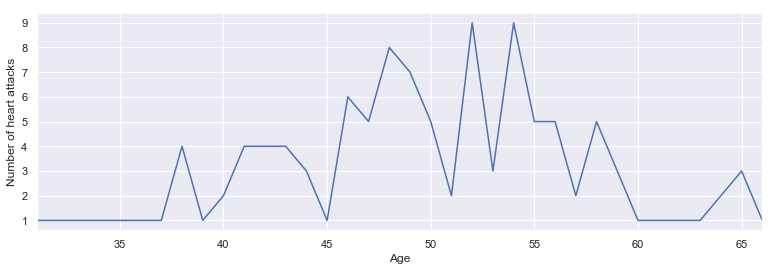

In [33]:
# It looks like that from 106 observations who had heart attack, 94 observation were males

# Now let's see which age is most affected and plot results using seaborn

OWHT=data[data.num==1]
sns.set()
plt.figure(figsize=(13,4))
OWHT.age.value_counts(sort=False).plot()
plt.xlabel('Age')
plt.ylabel('Number of heart attacks')

#### <br> 4. Feature selection <br>

In [34]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [35]:
# checking correlation

correlation=np.round(data.corr(),2)

In [36]:
sns.set()
plt.figure(figsize=(18,18))

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

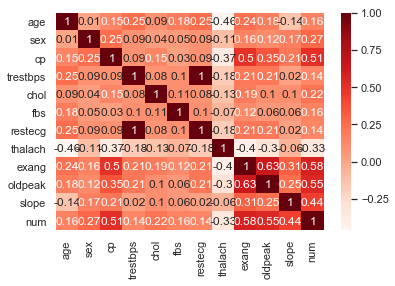

In [37]:
# Creating heatmap with correlations

sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds)

In [38]:
# import Extra trees classifier for additionally features selection

from sklearn.ensemble import ExtraTreesClassifier

In [39]:
# ExtraTreesClassifier need X and y to train and find best features

X=data.drop('num',axis=1)
y=data['num']

In [40]:
etc=ExtraTreesClassifier()

In [41]:
# Fitting ExtraTreesClassifier to X and y

etc.fit(X,y)

d:\program files\python\scripts\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [42]:
# now I can get attribute called feature_importances from etc object and creat 'barh' chart

feature_importances=pd.Series(etc.feature_importances_,index=X.columns)

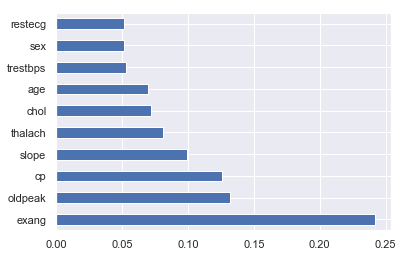

In [43]:
# creating 'barh' chart of feature importances

feature_importances.nlargest(10).plot(kind='barh')

In [44]:
# picking first 5 columns for model

feature_names=['cp','exang','slope','chol','oldpeak','thalach']

#### <br> 5. Creating regression model <br>

In [45]:
# creating Logistic regression model

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')
X=data[feature_names]
y=data['num']

In [46]:
# split data into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [47]:
# Fitting model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Predicting

y_pred=model.predict(X_test)

#### <br> 6. Model evaluation <br>

In [49]:
# Checking evaluation metrics

from sklearn import metrics

In [50]:
# Confusion matrix
# Value '4' stands for False Negatives which in this case is false predicted that person
# will not have heart attack and that is beacause treshold is 0.5 (50 % for each 0 and 1)
# so I will reduce error by getting observations which have probability over 0.35 ( 35 %)
# for heart attack
# This will decrease precision because number of False Positives will increase
# (false prediction that person will have heart attack)

# In this bussiness scenario decreasing precision goes in favor of the predictions

#Confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[44  4]
 [ 6 20]]


In [51]:
# Classification report

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        48
           1       0.83      0.77      0.80        26

    accuracy                           0.86        74
   macro avg       0.86      0.84      0.85        74
weighted avg       0.86      0.86      0.86        74



In [52]:
# Probabilities (0-100) in % for heart attack

y_pred_proba=model.predict_proba(X_test)

In [53]:
# create dataframe with probabilities with column names for 0 (No) and 1 (Yes)

probabilities=pd.DataFrame(y_pred_proba,columns=['No','Yes'])

In [54]:
# Since heart attack is something to concern about I will get observations
# where probability is above 35 %

above35=probabilities[probabilities.Yes>0.35]

In [55]:
# Creating new column with texual description of Risk level
# 0.35 to 0.50 => medium risk
# 0.51 to 0.70 => medium risk
# 0.71 to 0.85 => medium risk
# 0.86 to 1 => medium risk

above35['Risk level']=pd.cut(above35.Yes,[0.35,0.5,0.7,0.85,1],
                             labels=['medium risk','high risk','very high risk','severe'])

d:\program files\python\scripts\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
# Let's see which risk level have more observations

above35['Risk level'].value_counts()

severe            16
medium risk       10
very high risk     6
high risk          2
Name: Risk level, dtype: int64

In [57]:
# There is 15 observation with risk level of severe

# Values with risk level 'high risk', 'very high risk' and 'severe'
# Looks like there is need to pay attention for that particular observations !!

above35[above35['Risk level'].isin(['high risk', 'very high risk', 'severe'])]

,No,Yes,Risk level
3,0.073733,0.926267,severe
4,0.113886,0.886114,severe
10,0.188807,0.811193,very high risk
13,0.267719,0.732281,very high risk
15,0.348008,0.651992,high risk
20,0.048998,0.951002,severe
21,0.025335,0.974665,severe
24,0.120142,0.879858,severe
27,0.264796,0.735204,very high risk
30,0.158230,0.841770,very high risk


#### <br><br> 7. Bonus steps are using GridSearch with cross validation for hyper parameter tunning <br><br>

In [58]:
# import GridSearch with cross validation

from sklearn.model_selection import GridSearchCV

In [59]:
# I need to create pipeline with hyperparameters and then use GridSearchCV on that pipeline
# First import pipeline

from sklearn.pipeline import Pipeline

In [60]:
# Then create steps for pipeline
# I will also use StandardScaler to scale values in model for better performance

from sklearn.preprocessing import StandardScaler
steps=[('Standard_Scaler',StandardScaler()) ,
       ('Logistic_Regression',LogisticRegression())]


# C parameter => C=1/λ

C_range=10.**np.arange(-2,3)


# Penalty options (l1 for Lasso and l2 for Ridge)

penalty_options=['l1','l2']


# Creating parameter grid (defining hyperparameters)

param_grid=dict(Logistic_Regression__C=C_range,
                Logistic_Regression__penalty=penalty_options)

In [61]:
# Creating pipeline with defined steps

pipe=Pipeline(steps)

In [62]:
# Creating GridSearchCV with pipeline, parameter grid, 10 folds and accuracy scoring

GridSearchCV=GridSearchCV(pipe,param_grid,cv=10,scoring='accuracy')

In [63]:
# Again create X,y variables
# X=data.drop('num',axis=1)

X=data[feature_names]
y=data['num']

In [64]:
# Fit data to grid object
# Just ignore this 'solver' error
# I can silence this error by setting solver to 'lbfgs' but then I will not be allowed
# to use 'l1' penalty so just ignore error

GridSearchCV.fit(X,y)

d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files\python\scripts\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Standard_Scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Logistic_Regression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                  

In [78]:
# Best score (I set scoring to 'accuracy' )
# Model accuracy is 86% and will It be accepted or not  It depends on bussiness decision
# Sometimes 99% is not enogh but sometimes 60 % or 70 % is enough

np.round(GridSearchCV.best_score_,2)

0.86

In [79]:
# Best parameters
# This will print best value for parameter 'C' and best value for penalty option
# 'l1' Lasso and 'l2' Ridge

GridSearchCV.best_params_

{'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2'}

### <br>What I used to solve this task ? <br><br>

* <font color=white> <b> Scikit-learn </b></font> ( https://scikit-learn.org )
*  <font color=white> <b> Pandas </b></font> ( https://pandas.pydata.org/ )
*  <font color=white> <b> Numpy </b></font> ( https://numpy.org/ )
*  <font color=white> <b> Seaborn </b></font> ( https://seaborn.pydata.org )

<br><br>
<font color=white> <b> Scikit-learn </b></font> is a library in Python that provides many unsupervised and supervised learning algorithms.<br><br>
    
<font color=white> <b> Pandas </b></font> is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.<br><br>

<font color=white> <b> Numpy </b></font> is the fundamental package for scientific computing with Python.
<br><br>

<font color=white> <b> Seaborn </b></font> is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>

#### <br> Resources <br>

*  Logistic Regresion -  <a href="https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc">TowardsDataScience article about Logistic Regresion</a> <br><br>

*  Confusion matrix -  <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">TowardsDataScience article about Confusion matrix</a><br><br>
*  Classification report - https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html <br><br>
*  Feature selection -  <a href="https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e">TowardsDataScience article about Feature selection</a><br><br>
*  GridSearchCV -  https://scikit-learn.org/stable/modules/grid_search.html <br><br>
*  Ridge and Lasso -  <a href="https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b">TowardsDataScience article about Ridge and Lasso Regresion</a>
